 Assignment

## Instructions

In this assignment, you will apply the computer vision concepts covered in the lesson to perform image classification using the Fashion MNIST dataset. The Fashion MNIST dataset consists of 60,000 28x28 grayscale images of 10 fashion categories.

### Task: Build an Image Classifier

1. Use the provided starter code to load and explore the Fashion MNIST dataset
2. Preprocess the images using appropriate techniques (e.g., normalization, data augmentation)
3. Build a CNN model to classify the images into one of the 10 classes
4. Train your model and evaluate its performance
5. Experiment with at least one technique to improve model performance (e.g., batch normalization, different pooling strategies, additional convolutional layers)
6. Visualize and analyze your results


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the Fashion MNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Classes in Fashion MNIST
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# TODO: Build your CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Conv Layer 1: 1 input channel (gray), 32 filters, 3x3 kernel
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Conv Layer 2: 32 input, 64 output, 3x3 kernel
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        
        # Max pooling layer (reduces spatial dimensions by half)
        self.pool = nn.MaxPool2d(2, 2)
        
        # Fully Connected Layers
        # After two 2x2 poolings, a 28x28 image becomes 7x7
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10) # 10 classes
        
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Apply Conv -> ReLU -> Pool
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # Flatten the image for the linear layers
        x = x.view(-1, 64 * 7 * 7)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
model = SimpleCNN()


/home/pocl/miniconda3/envs/dl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 26421880/26421880 [00:03<00:00, 6918039.12it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 176388.70it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2791156.15it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6291456.00it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



# TODO: Train and evaluate your model


In [3]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Basic training loop snippet
def train(epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()           # Clear gradients
            outputs = model(images)         # Forward pass
            loss = criterion(outputs, labels) # Calculate loss
            loss.backward()                 # Backward pass (backprop)
            optimizer.step()                # Update weights
            running_loss += loss.item()
        print(f"Epoch {epoch+1} - Loss: {running_loss/len(train_loader)}")

# train(5) # Uncomment to run

In [5]:
# Execute training
train(10)

Epoch 1 - Loss: 0.514610540898641
Epoch 2 - Loss: 0.3548881697952747
Epoch 3 - Loss: 0.3122622124115626
Epoch 4 - Loss: 0.28503986845513185
Epoch 5 - Loss: 0.26554337840477626
Epoch 6 - Loss: 0.2503189874341091
Epoch 7 - Loss: 0.23729982664287091
Epoch 8 - Loss: 0.2270755715171496
Epoch 9 - Loss: 0.21789037251671156
Epoch 10 - Loss: 0.21268926740288735


In [6]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')
    return accuracy

In [7]:
evaluate_model(model, test_loader)

Accuracy on the test set: 91.00%


91.0

In [8]:
import matplotlib.pyplot as plt

def visualize_results(model, test_loader, classes):
    model.eval()
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    
    # Get predictions
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    # Plot images
    fig = plt.figure(figsize=(12, 8))
    for idx in range(8):
        ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
        # Unnormalize and display
        img = images[idx].numpy().squeeze() * 0.5 + 0.5
        plt.imshow(img, cmap='gray')
        
        # Color title based on if prediction is correct
        color = 'green' if preds[idx] == labels[idx] else 'red'
        ax.set_title(f"Pred: {classes[preds[idx]]}\nActual: {classes[labels[idx]]}", color=color)

# After training:
# visualize_results(model, test_loader, classes)

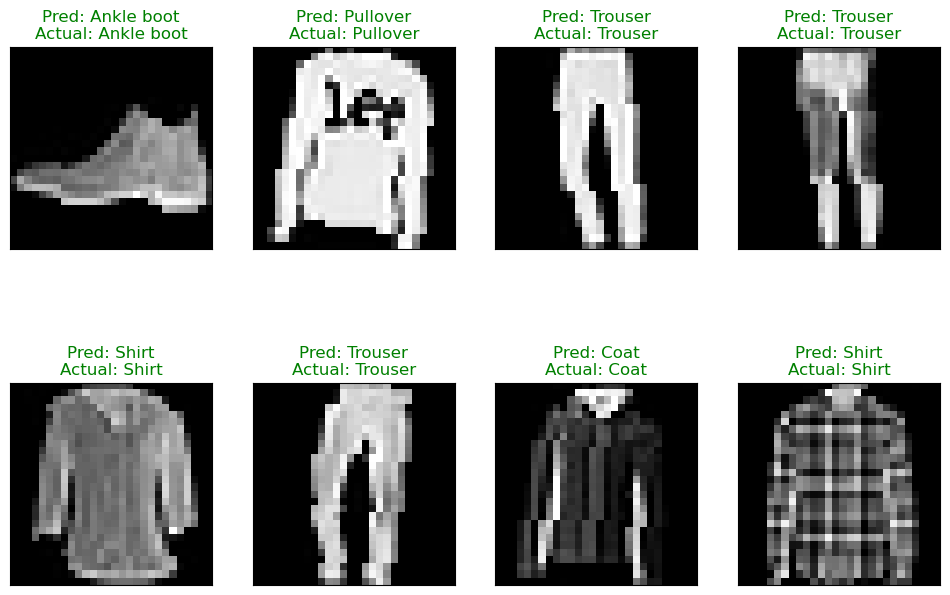

In [9]:
visualize_results(model, test_loader, classes)